In [1]:
import os
import json
import jsonlines
import pandas as pd

In [2]:
directory_path = 'results'
output_filename = f"combined.jsonl"

COMBINE_FILES = False

In [3]:
if COMBINE_FILES:
    combined_data = []

    for filename in os.listdir(directory_path):
        if filename == output_filename:
            continue
        print(f"Processing {filename.ljust(100)}", end="")
        # Check if the file is a .jsonl file
        if filename.endswith(".jsonl"):
            file_path = os.path.join(directory_path, filename)
            # Read the .jsonl file using jsonlines
            with jsonlines.open(file_path, mode='r') as reader:
                combined_data.extend(reader)
        print("Done")

    output_path = os.path.join(directory_path, output_filename)
    with jsonlines.open(output_path, mode='w') as writer:
        writer.write_all(combined_data)

    print(f"Combined data written to {output_path}")
else:
    print(f"Reading data from {output_filename}")

Reading data from combined.jsonl


In [4]:
detailed_results_path = os.path.join(directory_path, output_filename)

In [5]:
#detailed_results_path = 'results/detailed_model_results_Corsair_224_20241201.jsonl'
#detailed_results_path = 'results/detailed_model_results_DESKTOP-UHDJ875_512_20241201.jsonl'

In [6]:
with jsonlines.open(detailed_results_path) as reader:
    data = list(reader)

In [7]:
# Normalize the nested 'Results' into separate records
records = []
for run in data:
    model = run["Model"]
    run_num = run["Run"]
    timestamp = run.get("Timestamp", "")
    for pathology_result in run["Results"]:
        record = {
            "Model": model,
            "Run": run_num,
            "Timestamp": timestamp,
            "Pathology": pathology_result["Pathology"],
            "Validation AUC": pathology_result["Validation AUC"],
            "Test AUC": pathology_result["Test AUC"],
            "Validation Predictions": pathology_result["Validation Predictions"],
            "Validation Actuals": pathology_result["Validation Actuals"],
            "Test Predictions": pathology_result["Test Predictions"],
            "Test Actuals": pathology_result["Test Actuals"],
        }
        records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Display the first few rows
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
                Model  Run            Timestamp      Pathology  \
0  mobilenet_v3_large    1  2024-12-01 15:10:38    Atelectasis   
1  mobilenet_v3_large    1  2024-12-01 15:10:38   Cardiomegaly   
2  mobilenet_v3_large    1  2024-12-01 15:10:38  Consolidation   
3  mobilenet_v3_large    1  2024-12-01 15:10:38          Edema   
4  mobilenet_v3_large    1  2024-12-01 15:10:38       Effusion   

   Validation AUC  Test AUC  \
0        0.780539  0.720865   
1        0.849305  0.824784   
2        0.783517  0.709099   
3        0.911236  0.832906   
4        0.848530  0.763172   

                              Validation Predictions  \
0  [0.08640366792678833, 0.05792512372136116, 0.0...   
1  [0.010636736638844013, 0.016135914251208305, 0...   
2  [0.01127353310585022, 0.016500094905495644, 0....   
3  [0.003962911665439606, 0.030737359076738358, 0...   
4  [0.04628787934780121, 0.04065854102373123, 0.0...   

                                  Validation Act

In [8]:
# Display basic information about the DataFrame
print("\nDataFrame Information:")
print(df.info())

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display unique models and pathologies
print("\nUnique Models:", df["Model"].unique())
print("Unique Pathologies:", df["Pathology"].unique())

# Count of runs per model
print("\nRuns per Model:")
print(df.groupby("Model")["Run"].nunique())

# Count of runs per model and pathology
print("\nRuns per Model and Pathology:")
print(df.groupby(["Model", "Pathology"]).size().unstack(fill_value=0))
df


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   924 non-null    object 
 1   Run                     924 non-null    int64  
 2   Timestamp               924 non-null    object 
 3   Pathology               924 non-null    object 
 4   Validation AUC          924 non-null    float64
 5   Test AUC                924 non-null    float64
 6   Validation Predictions  924 non-null    object 
 7   Validation Actuals      924 non-null    object 
 8   Test Predictions        924 non-null    object 
 9   Test Actuals            924 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 72.3+ KB
None

Summary Statistics:
              Run  Validation AUC    Test AUC
count  924.000000      924.000000  924.000000
mean     2.818182        0.779351    0.749829
std     

,Model,Run,Timestamp,Pathology,Validation AUC,Test AUC,Validation Predictions,Validation Actuals,Test Predictions,Test Actuals
0,mobilenet_v3_large,1,2024-12-01 15:10:38,Atelectasis,0.780539,0.720865,"[0.08640366792678833, 0.05792512372136116, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.06350786983966827, 0.05825214460492134, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,mobilenet_v3_large,1,2024-12-01 15:10:38,Cardiomegaly,0.849305,0.824784,"[0.010636736638844013, 0.016135914251208305, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0025338323321193457, 0.24161015450954437, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,mobilenet_v3_large,1,2024-12-01 15:10:38,Consolidation,0.783517,0.709099,"[0.01127353310585022, 0.016500094905495644, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.012950025498867035, 0.009690040722489357, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,mobilenet_v3_large,1,2024-12-01 15:10:38,Edema,0.911236,0.832906,"[0.003962911665439606, 0.030737359076738358, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00048708272515796125, 0.004348094575107098,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,mobilenet_v3_large,1,2024-12-01 15:10:38,Effusion,0.848530,0.763172,"[0.04628787934780121, 0.04065854102373123, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.018370626494288445, 0.12039221823215485, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...
919,resnet101,5,2024-12-02 17:50:06,Mass,0.800900,0.729167,"[0.02342967316508293, 0.014288151636719704, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.021715497598052025, 0.003808258567005396, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
920,resnet101,5,2024-12-02 17:50:06,Nodule,0.724032,0.668881,"[0.03360362350940704, 0.023086296394467354, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0678183063864708, 0.04646912217140198, 0.06...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
921,resnet101,5,2024-12-02 17:50:06,Pleural_Thickening,0.737083,0.696883,"[0.04609321802854538, 0.009051991626620293, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.016151538118720055, 0.02741307206451893, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
922,resnet101,5,2024-12-02 17:50:06,Pneumonia,0.695441,0.689807,"[0.003973681479692459, 0.0008653923869132996, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.000201075104996562, 0.0017697772709652781, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


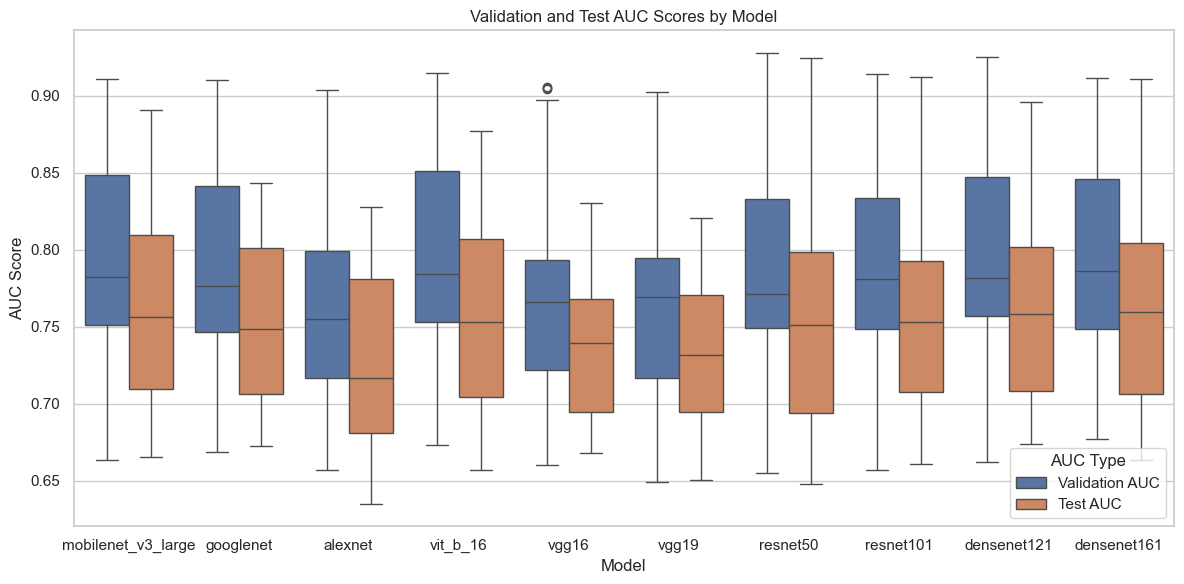

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Melt the DataFrame to have AUC types as a variable
df_melted = df.melt(id_vars=["Model", "Pathology"], 
                    value_vars=["Validation AUC", "Test AUC"],
                    var_name="AUC Type", 
                    value_name="AUC Score")

# Create a boxplot
sns.boxplot(x="Model", y="AUC Score", hue="AUC Type", data=df_melted)

# Add title and labels
plt.title("Validation and Test AUC Scores by Model")
plt.xlabel("Model")
plt.ylabel("AUC Score")
plt.legend(title="AUC Type")

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
# Show mean +- std for each model
print("\nMean and Standard Deviation of AUC Scores by Model:")
print(df.groupby("Model")["Validation AUC"].agg(["mean", "std"]))
print(df.groupby("Model")["Test AUC"].agg(["mean", "std"]))


Mean and Standard Deviation of AUC Scores by Model:
                        mean       std
Model                                 
alexnet             0.756933  0.064098
densenet121         0.793289  0.068076
densenet161         0.791649  0.066732
googlenet           0.780824  0.063765
mobilenet_v3_large  0.785859  0.065662
resnet101           0.783191  0.067170
resnet50            0.781732  0.070198
vgg16               0.765225  0.061375
vgg19               0.761418  0.066596
vit_b_16            0.792690  0.069045
                        mean       std
Model                                 
alexnet             0.724966  0.055606
densenet121         0.760107  0.060091
densenet161         0.759154  0.063932
googlenet           0.750678  0.053824
mobilenet_v3_large  0.758563  0.057496
resnet101           0.754894  0.061817
resnet50            0.753118  0.064544
vgg16               0.739844  0.046872
vgg19               0.736930  0.048016
vit_b_16            0.758623  0.062311


In [11]:
# Group and Aggregate for each Pathology and Model
aggregated = (
    df.groupby(["Pathology", "Model"])
    .agg(mean=("Validation AUC", "mean"), std=("Validation AUC", "std"))
    .reset_index()
)

# Format the mean and std as a single column
aggregated["Result"] = (
    aggregated["mean"].round(4).astype(str) + " ± " + aggregated["std"].round(4).astype(str)
)

# Pivot the table
pivot_table = aggregated.pivot(index="Pathology", columns="Model", values="Result")

# Replace missing values with "—"
pivot_table = pivot_table.fillna("—")

# Compute the Mean ± Std for each Model
mean_std = (
    df.groupby("Model")["Validation AUC"]
    .agg(["mean", "std"])
    .round(4)
    .reset_index()  # Reset index to ensure "Model" is a column
    .assign(Result=lambda x: x["mean"].astype(str) + " ± " + x["std"].astype(str))
    .set_index("Model")["Result"]  # Set "Model" as index and keep "Result"
)

# Add the Mean ± Std as the last row
pivot_table.loc["Mean"] = mean_std



In [12]:
pivot_table

Model,alexnet,densenet121,densenet161,googlenet,mobilenet_v3_large,resnet101,resnet50,vgg16,vgg19,vit_b_16
Pathology,,,,,,,,,,
Atelectasis,0.7624 ± 0.0048,0.7831 ± 0.0073,0.7836 ± 0.0095,0.7767 ± 0.005,0.7853 ± 0.0039,0.7858 ± 0.0028,0.7707 ± 0.0114,0.7703 ± 0.0083,0.772 ± 0.0054,0.7881 ± 0.0063
Cardiomegaly,0.8075 ± 0.0072,0.8568 ± 0.0071,0.8489 ± 0.0068,0.8363 ± 0.0126,0.8501 ± 0.0054,0.8355 ± 0.0056,0.8395 ± 0.0074,0.8044 ± 0.0116,0.8012 ± 0.0274,0.8797 ± 0.0096
Consolidation,0.7597 ± 0.0052,0.7818 ± 0.003,0.7863 ± 0.0027,0.7747 ± 0.0068,0.7757 ± 0.0066,0.7758 ± 0.0032,0.7593 ± 0.0061,0.7695 ± 0.0081,0.7752 ± 0.0062,0.7844 ± 0.0034
Edema,0.8996 ± 0.0033,0.9028 ± 0.0022,0.9071 ± 0.0039,0.9036 ± 0.0055,0.9046 ± 0.0043,0.8992 ± 0.0048,0.8914 ± 0.0076,0.9011 ± 0.0057,0.8951 ± 0.0076,0.9038 ± 0.0037
Effusion,0.824 ± 0.0049,0.8521 ± 0.0062,0.8597 ± 0.0008,0.847 ± 0.0032,0.8509 ± 0.0028,0.8498 ± 0.0061,0.8445 ± 0.0093,0.8463 ± 0.0054,0.8429 ± 0.0085,0.852 ± 0.0049
Emphysema,0.7231 ± 0.0102,0.7589 ± 0.0093,0.7513 ± 0.0036,0.7511 ± 0.0071,0.7694 ± 0.0087,0.7594 ± 0.009,0.7599 ± 0.0078,0.7278 ± 0.0109,0.7327 ± 0.0174,0.7733 ± 0.0123
Fibrosis,0.7358 ± 0.0042,0.7722 ± 0.0043,0.7573 ± 0.0086,0.7629 ± 0.0053,0.7704 ± 0.0036,0.7566 ± 0.0112,0.7645 ± 0.0054,0.728 ± 0.0086,0.7163 ± 0.0005,0.7611 ± 0.0134
Hernia,0.8222 ± 0.027,0.9095 ± 0.0146,0.8863 ± 0.0171,0.8575 ± 0.0118,0.8721 ± 0.0086,0.8819 ± 0.0282,0.9061 ± 0.0178,0.7844 ± 0.032,0.7759 ± 0.1104,0.8874 ± 0.0192
Infiltration,0.6642 ± 0.0047,0.6708 ± 0.0063,0.6778 ± 0.0013,0.6704 ± 0.0016,0.671 ± 0.0044,0.6623 ± 0.0028,0.6637 ± 0.0059,0.6668 ± 0.0057,0.6617 ± 0.0007,0.6792 ± 0.0045


In [24]:
def pivot_table_to_latex_with_bold(pivot_table, caption, label, row_label="Condition", max_columns=4):
    """
    Convert a pivot table DataFrame into multiple LaTeX tabular strings with the highest value in each row bolded.
    Escapes underscores in column headers and replaces underscores with spaces in row labels for LaTeX compatibility.
    Splits the table into chunks of at most `max_columns` models.

    Parameters:
        pivot_table (DataFrame): The DataFrame to convert.
        caption (str): The caption for the LaTeX table.
        label (str): The label for the LaTeX table for referencing.
        row_label (str): The label for the first column.
        max_columns (int): Maximum number of models (columns) per table.

    Returns:
        str: LaTeX tables as a formatted string.
    """
    latex_tables = []

    # Escape underscores in column headers for LaTeX
    escape_latex = lambda x: x.replace("_", "")
    pivot_table.columns = [escape_latex(col) for col in pivot_table.columns]

    # Replace underscores with spaces in row labels (index)
    pivot_table.index = [idx.replace("_", " ") for idx in pivot_table.index]

    # Split the table into chunks of `max_columns`
    for i in range(0, len(pivot_table.columns), max_columns):
        sub_table = pivot_table.iloc[:, i:i + max_columns]

        # Begin the table environment
        latex_table = []
        latex_table.append("\\begin{table}[ht]")
        latex_table.append("\\centering")
        latex_table.append("\\begin{tabular}{l" + "c" * len(sub_table.columns) + "}")
        latex_table.append("\\toprule")

        # Add column headers
        column_headers = " & ".join([f"\\textbf{{{col}}}" for col in [row_label] + list(sub_table.columns)])
        latex_table.append(column_headers + " \\\\ \\midrule")

        # Add rows
        for idx, row in sub_table.iterrows():
            formatted_row = [f"{idx}"]  # Row label
            values = []

            max_value = None
            try:
                max_value = max([float(val.split(" ± ")[0]) for val in row if val != "---"])
            except Exception:
                pass

            for col, value in row.items():
                if value == "---":
                    values.append("---")
                else:
                    # Replace ± with \pm for LaTeX compatibility
                    value = value.replace(" ± ", " \\pm ")
                    if float(value.split(" \\pm ")[0]) == max_value:
                        values.append(f"$\\mathbf{{{value}}}$")
                    else:
                        values.append(f"${value}$")

            formatted_row.append(" & ".join(values))
            latex_table.append(" & ".join(formatted_row) + " \\\\")

        # Add the bottom rule and table footer
        latex_table.append("\\bottomrule")
        latex_table.append("\\end{tabular}")
        latex_table.append(f"\\caption{{{caption} (Part {i // max_columns + 1})}}")
        latex_table.append(f"\\label{{{label}_part{i // max_columns + 1}}}")
        latex_table.append("\\end{table}")

        latex_tables.append("\n".join(latex_table))

    return "\n\n".join(latex_tables)


# Example usage with a pivot_table DataFrame
caption = "Mean $\\pm$ Std values for different models across conditions."
label = "tab:results"

latex_output = pivot_table_to_latex_with_bold(
    pivot_table=pivot_table,
    caption=caption,
    label=label,
    row_label="Condition",
    max_columns=12  # Set the maximum number of models per table
)

# Print the LaTeX tables for copy-paste
print(latex_output)


\begin{table}[ht]
\centering
\begin{tabular}{lcccccccccc}
\toprule
\textbf{Condition} & \textbf{alexnet} & \textbf{densenet121} & \textbf{densenet161} & \textbf{googlenet} & \textbf{mobilenetv3large} & \textbf{resnet101} & \textbf{resnet50} & \textbf{vgg16} & \textbf{vgg19} & \textbf{vitb16} \\ \midrule
Atelectasis & $0.7624 \pm 0.0048$ & $0.7831 \pm 0.0073$ & $0.7836 \pm 0.0095$ & $0.7767 \pm 0.005$ & $0.7853 \pm 0.0039$ & $0.7858 \pm 0.0028$ & $0.7707 \pm 0.0114$ & $0.7703 \pm 0.0083$ & $0.772 \pm 0.0054$ & $\mathbf{0.7881 \pm 0.0063}$ \\
Cardiomegaly & $0.8075 \pm 0.0072$ & $0.8568 \pm 0.0071$ & $0.8489 \pm 0.0068$ & $0.8363 \pm 0.0126$ & $0.8501 \pm 0.0054$ & $0.8355 \pm 0.0056$ & $0.8395 \pm 0.0074$ & $0.8044 \pm 0.0116$ & $0.8012 \pm 0.0274$ & $\mathbf{0.8797 \pm 0.0096}$ \\
Consolidation & $0.7597 \pm 0.0052$ & $0.7818 \pm 0.003$ & $\mathbf{0.7863 \pm 0.0027}$ & $0.7747 \pm 0.0068$ & $0.7757 \pm 0.0066$ & $0.7758 \pm 0.0032$ & $0.7593 \pm 0.0061$ & $0.7695 \pm 0.0081$ & $0.7752 